In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import HTML
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score,classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split



<h1> Gradient Boosting Trees using Python </h1>


<h2>Introduction </h2>
<br>

<li> Boosting algorithms are a family of machine learning algorithms that combine "weak learners" to form a "strong learner". A weak learner is any machine learning algorithm that has better accuracy than simply guessing, but only performs well on a subset of the data. Boosting works by using these to solve subsections of the problem, by peeling them away so future boosting iterations can solve the remaining sections.

<li> For instance, an algorithm classifying animals at a zoo only classifies zebras correctly, most of the time, and simply guesses for other animals. Boosting involves using the model for zebras while other weak learners to focus on the remaining animals.
    
<li> In the case of Gradient Boosting Trees, Decision Trees are the weak learners.  
    
<h2> Gradient Boosting Regression </h2>
    
<li> For Regression, 
      1. each possible split of the tree is examined. I.e. the data is split around each value in the dataset. 
      2. The split is selected so that values closest to each other are clumped together (i.e Sum of Squared errors of Split Value and each datapoint) is minimized.
      3. The average error in the 2 subsets is added to all values in the group.
      4. The process is repeated until a certain depth is reached.

In [2]:
news_data = pd.read_csv("OnlineNewsPopularity.csv")


In [3]:
news_data.columns = news_data.columns.str.lstrip()

In [4]:
# data types of the variables
news_data.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    39644.000000  39644.000000  39644.000000  ...           39644.000000   
mean         3.293638      4.544143      1.249874  ...               0.095446   
std          3.855141      8.309434      4.107855  ...               0.071315   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.050000   
50%          3.000000      1.000000      0.000000  ...               0.100000   
75%          4.000000      4.000000      1.000000  ...               0.100000   
max        116.000000    128.000000     91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    1400.000000  
75%                  0.500000                      0.250000    2

In [5]:
# Create binary variable popularity based on number of shares:
news_data.loc[news_data.shares >= 1400,'popular'] = 1
news_data.loc[news_data.shares < 1400,'popular'] = 0

In [6]:
# Seperate target and training features
X = news_data.drop(['popular','shares','url'],axis = 1)
y = news_data['popular']
y = pd.Series(y)


#### Step 4: Data pre-processing
Since features are on different scales, standardizing them by subtracting means and dividing by the standard deviations.

In [7]:
# # # Separate numeric variables from the categorical

# X_cat = X[['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed',
#           'data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday',
#           'weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']]

# X_num = X[X.columns.difference(X_cat.columns)]

# # X_num = X

In [8]:
# # Min max scaling
# scaler = preprocessing.MinMaxScaler()
# X_sc = scaler.fit_transform(X_num, y=y)
# X_sc = pd.DataFrame(X_sc, index=X_num.index, columns=X_num.columns)

# X_sc = pd.concat([X_sc, X_cat], axis = 1)

# # sc_y = StandardScaler()
# y = np.array(y).reshape(-1,1)
# y_sc = scaler.fit_transform(y)
# y_sc = y.flatten()


#### Step 3: Split into train, test and validation sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3,
                                                   random_state = 123)

#It's good practice to stratify your sample by the target variable. 
#This will ensure your training set looks similar to your test set, making your evaluation metrics more reliable

In [10]:
# We use min-max scaling to scale the data
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [11]:
# Split training data into testing and validation

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)

In [12]:

learning_rates = [0.01,0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=500, learning_rate = learning_rate, max_features=40, max_depth = 6, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()

Learning rate:  0.01
Accuracy score (training): 0.762
Accuracy score (validation): 0.669

Learning rate:  0.05
Accuracy score (training): 0.899
Accuracy score (validation): 0.667

Learning rate:  0.1
Accuracy score (training): 0.976
Accuracy score (validation): 0.662

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.652

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.648

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.635

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.627



In [13]:
# Using learning rate 1:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.1, max_features=40, max_depth = 6, random_state = 0)
gb.fit(X_train_sub, y_train_sub)
predictions = gb.predict(X_validation_sub)

print("Confusion Matrix:")
print(confusion_matrix(y_validation_sub, predictions))
print()
print("Classification Report")
print(classification_report(y_validation_sub, predictions))

Confusion Matrix:
[[1970 1285]
 [1059 2624]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63      3255
         1.0       0.67      0.71      0.69      3683

    accuracy                           0.66      6938
   macro avg       0.66      0.66      0.66      6938
weighted avg       0.66      0.66      0.66      6938



In [14]:
del auc

Area under ROC curve = 0.72


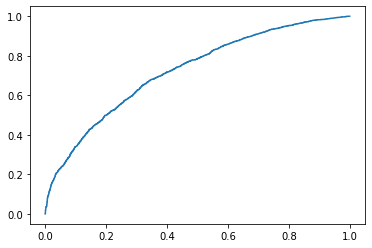

In [18]:
from sklearn.metrics import auc
# ROC curve and Area-Under-Curve (AUC)

y_pred_proba = gb.predict_proba(X_validation_sub)[::,1]
y_scores_gb = gb.decision_function(X_validation_sub)

fpr_gb, tpr_gb, _ = roc_curve(y_validation_sub, y_scores_gb)

roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.plot(fpr_gb,tpr_gb,label="data 1, auc="+str(roc_auc_gb))

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))


#### Other Classifiers:

In [28]:
lr = LogisticRegression(max_iter=1000)
clf_lr=lr.fit(X_train,y_train)

lr_train_acc = clf_lr.score(X_train,y_train.ravel())
lr_train_acc = str(lr_train_acc.round(2) * 100) + ' %'


lr_test_acc = clf_lr.score(X_validation_sub,y_validation_sub.ravel())
lr_test_acc = str(lr_test_acc.round(2) * 100) + ' %'

print('Logistic Regression:')
print('Training Accuracy='+ lr_train_acc)
print('Testing Accuracy='+ lr_test_acc)



Logistic Regression:
Training Accuracy=61.0 %
Testing Accuracy=48.0 %


In [27]:
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf=rf.fit(X_train,y_train)


rf_train_acc = clf_rf.score(X_train,y_train)
rf_train_acc = str(rf_train_acc.round(2) * 100) + ' %'


rf_test_acc = clf_rf.score(X_validation_sub,y_validation_sub.ravel())
rf_test_acc = str(rf_test_acc.round(2) * 100) + ' %'

print('Random Forest:')
print('Training Accuracy='+ rf_train_acc)
print('Testing Accuracy='+ rf_test_acc)


Random Forest:
Training Accuracy=100.0 %
Testing Accuracy=55.00000000000001 %
